# Assemble Results of Speed Benchmarks

In [2]:
import os

import pandas as pd

dirname_qe = "./"
dirnames_qtm = ["./"]

qe_files = []
l_qtm_files = []

l_dict_qe = []
l_dict_qtm = []

# Create a Pandas DataFrame to store the data
columns = [
    "numprocs",
    "numcalls_scf",
    "total_time_scf",
    "numcalls_hpsi",
    "total_time_hpsi",
]


for filename in os.listdir(dirname_qe):
    if "qe" in filename:
        qe_files.append(filename)

for i, dirname in enumerate(dirnames_qtm):
    l_qtm_files.append([])
    for filename in os.listdir(dirname):
        if "qtm" in filename:
            l_qtm_files[i].append(filename)

print(qe_files)
print(l_qtm_files)

# Process qe_files separately
for filename in qe_files:
    # Extract information from lines of the form:
    # electrons    :    290.33s CPU    294.56s WALL (       1 calls)
    # h_psi        :    183.07s CPU    184.02s WALL (      85 calls)

    with open(dirname_qe + filename, "r") as f:
        lines = f.readlines()
        for line in lines:

            if line.strip().startswith("electrons    "):
                # Extract the numcalls and total_time
                numcalls_scf = int(line.split()[7])
                total_time_scf = float(line.split()[4][:-1])

            elif line.strip().startswith("h_psi        :"):
                numcalls_hpsi = int(line.split()[7])
                total_time_hpsi = float(line.split()[4][:-1])
        l_dict_qe.append(
            {
                "numprocs": int(filename.split("_")[4].split(".")[0]),
                "numcalls_scf": numcalls_scf,
                "total_time_scf": total_time_scf,
                "numcalls_hpsi": numcalls_hpsi,
                "total_time_hpsi": total_time_hpsi,
            }
        )

df_qe = pd.DataFrame(data=l_dict_qe, columns=columns)
display(df_qe)

# Process qtm_files separately
l_df_qtm = []
for filenames, dirname in zip(l_qtm_files, dirnames_qtm):
    print(i, filenames, dirname)
    l_dict_qtm.append([])
    for filename in filenames:
        # Extract information from lines of the form:
        # |           scf:scf            |       1|  695.25| STOPPED |
        # |         KSHam:h_psi          |     248|  405.93| STOPPED |
        with open(dirname + filename, "r") as f:
            lines = f.readlines()
            for line in lines:
                if line.strip().startswith("|           scf:scf            "):
                    numcalls_scf = int(line.split("|")[2].strip())
                    total_time_scf = float(line.split("|")[3].strip())
                elif line.strip().startswith("|         KSHam:h_psi          "):
                    numcalls_hpsi = int(line.split("|")[2].strip())
                    total_time_hpsi = float(line.split("|")[3].strip())
            if int(filename.split("_")[3].split(".")[0])==56:
                print("Skipping 56 procs")
                continue
            l_dict_qtm[-1].append(
                {
                    "numprocs": int(filename.split("_")[3].split(".")[0]),
                    "numcalls_scf": numcalls_scf,
                    "total_time_scf": total_time_scf,
                    "numcalls_hpsi": numcalls_hpsi,
                    "total_time_hpsi": total_time_hpsi,
                }
            )

    l_df_qtm.append(pd.DataFrame(data=l_dict_qtm[-1], columns=columns))
    display(l_df_qtm[-1])






['Si_qe_lapack_nb_1.scf.out', 'Si_qe_lapack_nb_2.scf.out', 'Si_qe_lapack_nb_4.scf.out', 'Si_qe_lapack_nb_8.scf.out', 'Si_qe_lapack_nb_14.scf.out', 'Si_qe_lapack_nb_28.scf.out']
[['Si_qtm_nb_1.scf.out', 'Si_qtm_nb_2.scf.out', 'Si_qtm_nb_4.scf.out', 'Si_qtm_nb_8.scf.out', 'Si_qtm_nb_14.scf.out', 'Si_qtm_nb_28.scf.out', 'Si_qtm_nb_56.scf.out']]


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,14886.91,158,9199.83
1,2,1,8017.66,158,4726.31
2,4,1,4662.40,158,2558.04
3,8,1,2949.69,158,1453.54
4,14,1,2309.60,158,945.87
5,28,1,2011.01,158,666.88


0 ['Si_qtm_nb_1.scf.out', 'Si_qtm_nb_2.scf.out', 'Si_qtm_nb_4.scf.out', 'Si_qtm_nb_8.scf.out', 'Si_qtm_nb_14.scf.out', 'Si_qtm_nb_28.scf.out', 'Si_qtm_nb_56.scf.out'] ./
Skipping 56 procs


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,14112.80,119,8279.42
1,2,1,7454.98,119,4196.69
2,4,1,4316.42,119,2255.31
3,8,1,2743.18,119,1298.49
4,14,1,2214.77,119,912.73
5,28,1,2103.37,117,668.91


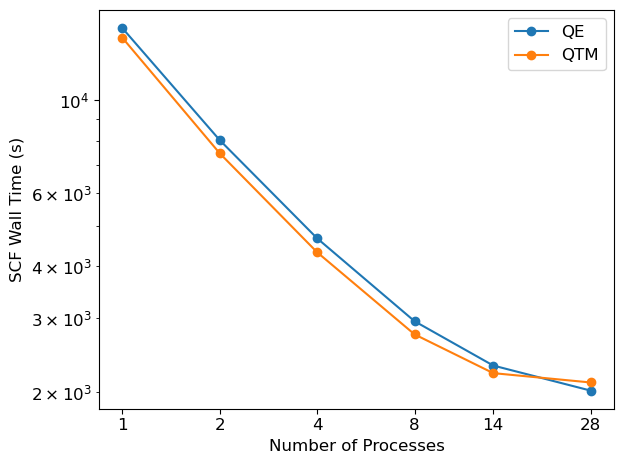

In [3]:
# Plot total_time_scf vs numprocs for both qe and qtm on the same plot
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.size"] = 12
# matplotlib.rcParams["text.usetex"] = True
# matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath} \boldmath"

# increase the resolution of the plot
# plt.rcParams["figure.dpi"] = 300


# qtty = "total_time_scf"
qtty = "total_time_scf"

plt.plot(df_qe["numprocs"], df_qe[qtty], label="QE", marker="o")
for i, df_qtm in enumerate(l_df_qtm):
    plt.plot(df_qtm["numprocs"], df_qtm[qtty], label="QTM", marker="o")
# plt.plot(df_qtm["numprocs"], df_qtm[qtty], label="QTM", marker="o")
# plt.plot(df_qe["numprocs"], 1.25*df_qe[qtty], label="1.25xQE", linestyle="--")
plt.xlabel("Number of Processes")
plt.ylabel("SCF Wall Time (s)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
# plt.title("Band Parallelization of SCF")
plt.xticks(df_qe["numprocs"], labels=df_qe["numprocs"])
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tight_layout()
plt.savefig("bands_si_6x6x6.pdf")
plt.show()


In [4]:
# Merge the dataframes of qe and qtm
df_merged = df_qe.merge(l_df_qtm[0], on="numprocs", suffixes=("_qe", "_qtm"))
# Remove certain columns:
# df_merged.drop(columns=["numcalls_scf_qtm", "numcalls_scf_qe"], inplace=True)
# Arrange the columns in a certain order
df_merged = df_merged[["numprocs", "total_time_scf_qe", "total_time_scf_qtm", "numcalls_hpsi_qe", "numcalls_hpsi_qtm"]]
# Change titles in the table
df_merged.columns = ["Number of Processes", "QE SCF Wall Time (s)", "QTM SCF Wall Time (s)", "QE h_psi Calls", "QTM h_psi Calls"]
df_merged["QE SCF Wall Time (s)"] = df_merged["QE SCF Wall Time (s)"].astype(int)
df_merged["QTM SCF Wall Time (s)"] = df_merged["QTM SCF Wall Time (s)"].astype(int)
display(df_merged)
df_merged.to_csv("bands_si_6x6x6.csv", index=False)

,Number of Processes,QE SCF Wall Time (s),QTM SCF Wall Time (s),QE h_psi Calls,QTM h_psi Calls
0,1,14886,14112,158,119
1,2,8017,7454,158,119
2,4,4662,4316,158,119
3,8,2949,2743,158,119
4,14,2309,2214,158,119
5,28,2011,2103,158,117
